In [1]:
import cv2
import matplotlib.pyplot as plt

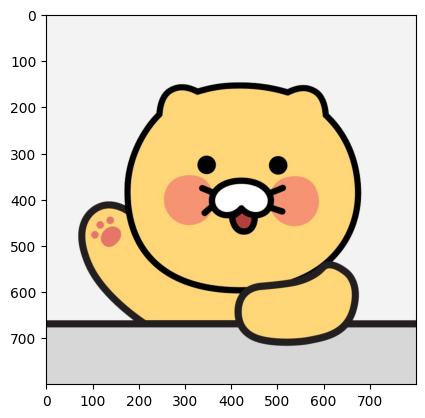

In [2]:
cv.2.IMREAD_COLOR : 이미지를 컬러로 읽어들임
cv2.IMREAD_GRAYSCALE : 이미지를 흑백으로 읽어들임
cv2.IMREAD_UNCHANGED : 이미지를 알파 채널(투명도 채널)까지 포함하여 읽어들임
img_basic = cv2.imread('../assets/cs.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
px = img_basic[500, 500]
B, G, R 순서로 출력
px

array([120, 215, 255], dtype=uint8)

In [4]:
G만 출력
px[1]

215

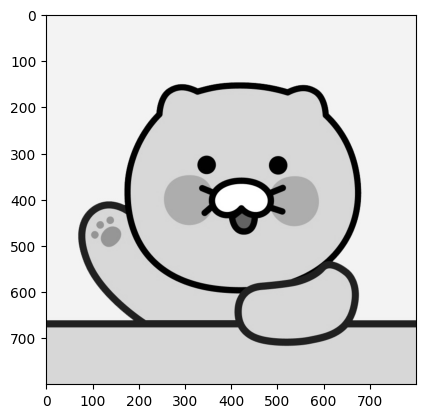

In [5]:
img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))
plt.show()

In [6]:
print(img_basic.shape)
print(img_basic.size)

(800, 800)
640000


In [7]:
px = img_basic[550, 400]
px

216

--- 0.0029897689819335938 seconds ---
--- 0.0 seconds ---


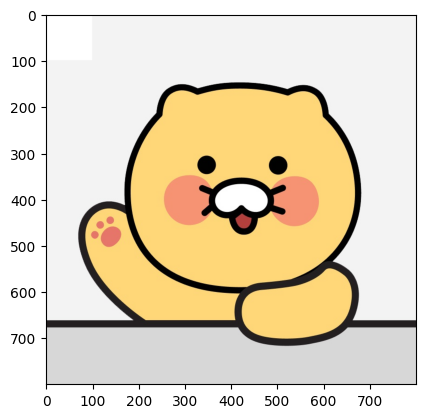

In [8]:
import time

img_basic = cv2.imread('../assets/cs.jpg')

start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        img_basic[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
img_basic[0:100, 0:100] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

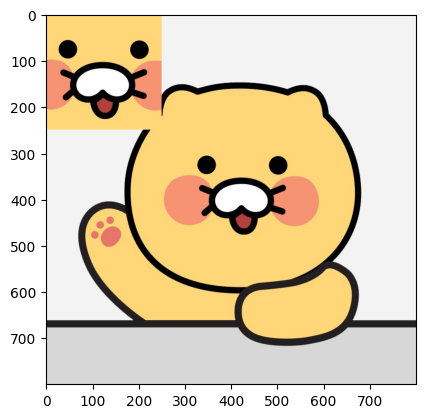

In [9]:
img_basic = cv2.imread('../assets/cs.jpg', cv2.IMREAD_UNCHANGED)

ROI(Region of Interest, 관심 영역) 설정
필터링하거나 어떤 식으로든 연산을 수행하려는 영상의 부분
[y범위, x범위]
roi = img_basic[250:500, 300:550]
img_basic[0:250, 0:250] = roi

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

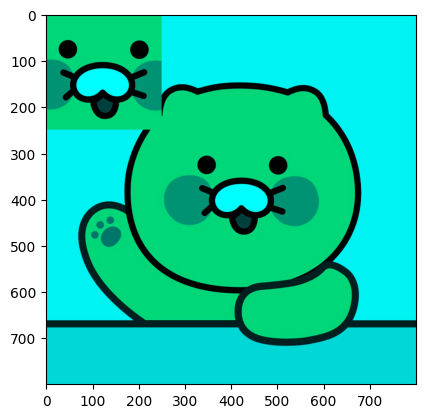

In [10]:
img_basic[:, :, 2] = 0

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

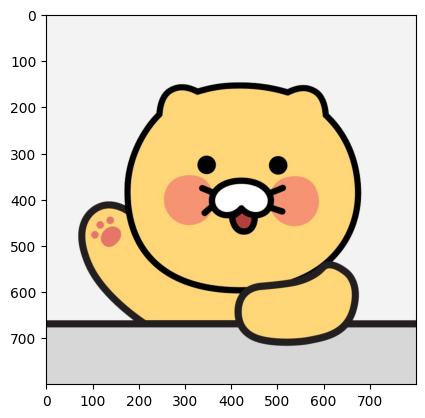

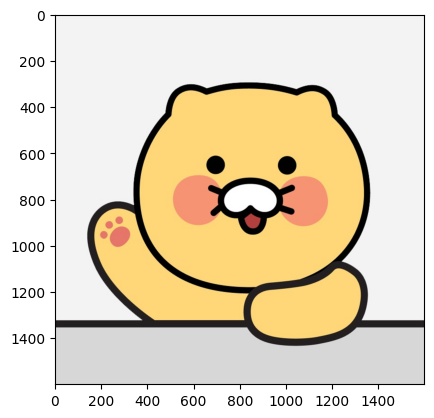

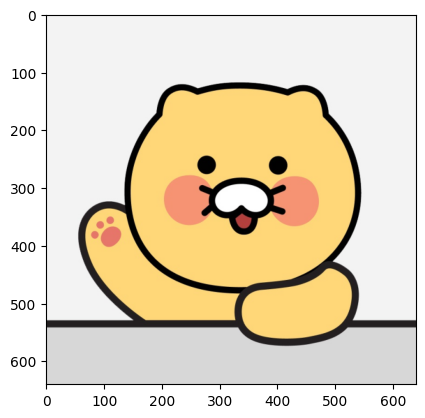

In [19]:
이미지 사이즈 변경

img_basic = cv2.imread('../assets/cs.jpg')
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

expand = cv2.resize(img_basic, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

shrink = cv2.resize(img_basic, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

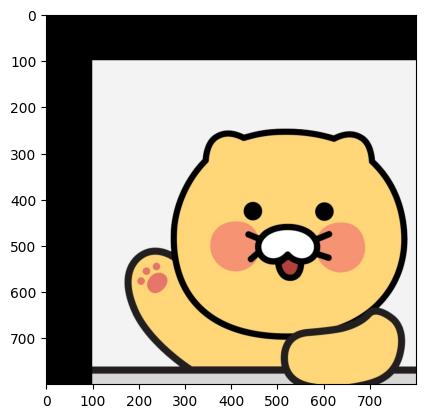

In [25]:
import numpy as np

img_basic = cv2.imread('../assets/cs.jpg')

행과 열 정보만 저장
height, width = img_basic.shape[:2]

M = np.float32([[1, 0, 100], [0, 1, 100]])

이동 변환을 표현하는 어파인 변환 행렬
dst = cv2.warpAffine(img_basic, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

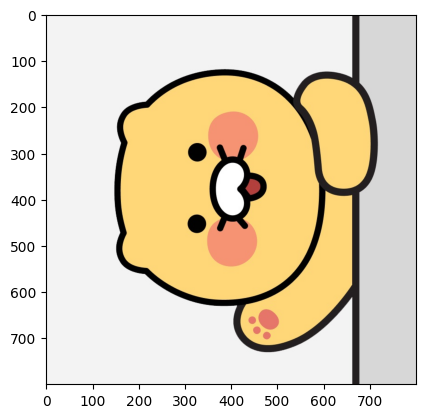

In [29]:
img_basic = cv2.imread('../assets/cs.jpg')

행과 열 정보만 저장
height, width = img_basic.shape[:2]

cv2.getRotationMatrix2D(center, angle, scale) : 이미지 회전을 위한 변환 행렬을 생성
M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 1)
dst = cv2.warpAffine(img_basic, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

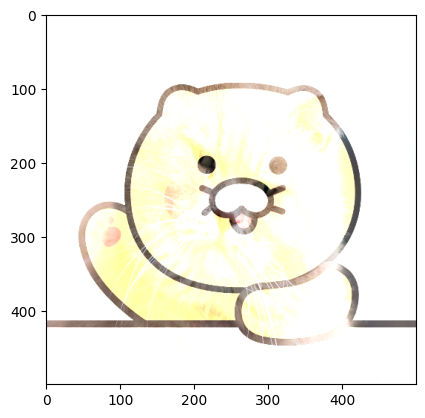

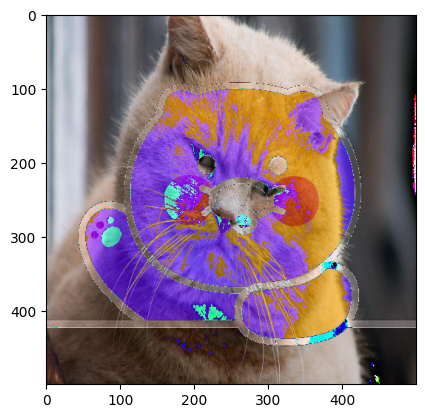

In [31]:
img_bw_1 = cv2.imread('../assets/cs.jpg')
img_bw_2 = cv2.imread('../assets/cc.jpg')

두 이미지를 같은 사이즈로 변환
img_bw_1 = cv2.resize(img_bw_1, (500, 500), interpolation=cv2.INTER_CUBIC)
img_bw_2 = cv2.resize(img_bw_2, (500, 500), interpolation=cv2.INTER_CUBIC)

cv2.add(): Saturation 연산
0보다 작으면 0, 255보다 크면 255로 표현
result = cv2.add(img_bw_1, img_bw_2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

np.add() : Modulo 연산
256은 0, 257은 1로 표현
result = img_bw_1 + img_bw_2
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

cv2.threshold(img_bw, thresh, max_value, type) : 임계값을 기준으로 흑/백으로 분류하는 함수

img_bw : 처리할 Gray Scale 이미지
thresh : 임계 값 (전체 픽셀에 적용)
max_value : 임계 값을 넘었을 때 적용할 값
type : 임계점을 처리하는 방식

1. THRESH_BINARY : 임계 값보다 크면 max_value, 작으면 0
2. THRESH_BINARY_INV : 임계 값보다 작으면 max_value, 크면 0
3. THRESH_TRUNC : 임계 값보다 크면 임계 값, 작으면 그대로
4. THRESH_TOZERO : 임계 값보다 크면 그대로, 작으면 0
5. THRESH_TOZERO_INV : 임계 값보다 크면 0, 작으면 그대로

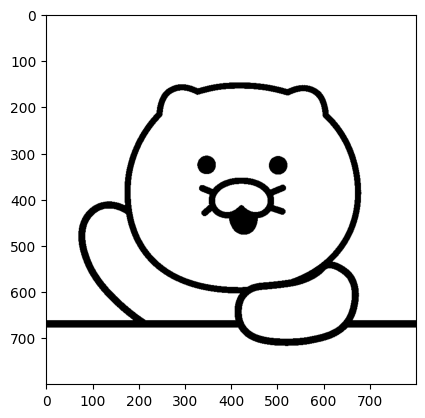

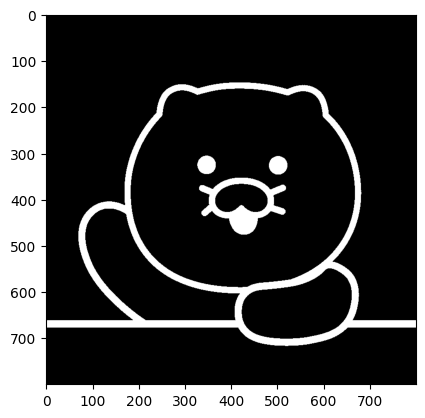

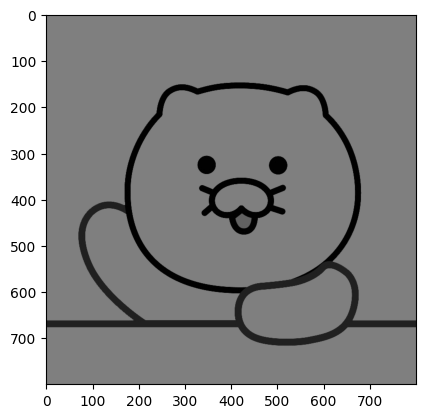

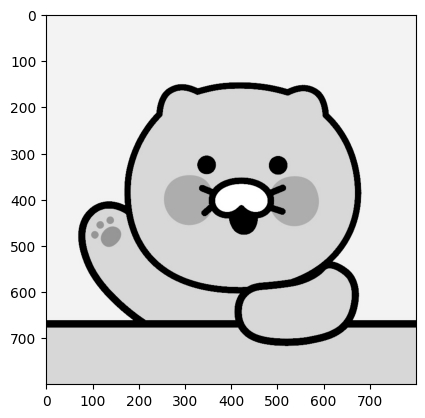

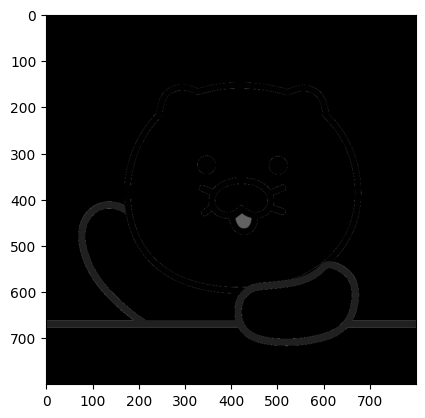

In [32]:
img_bw = cv2.imread('../assets/cs.jpg', cv2.IMREAD_GRAYSCALE)

img_bws = []
ret, thres1 = cv2.threshold(img_bw, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(img_bw, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(img_bw, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(img_bw, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(img_bw, 127, 255, cv2.THRESH_TOZERO_INV)
img_bws.append(thres1)
img_bws.append(thres2)
img_bws.append(thres3)
img_bws.append(thres4)
img_bws.append(thres5)

for i in img_bws:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    plt.show()

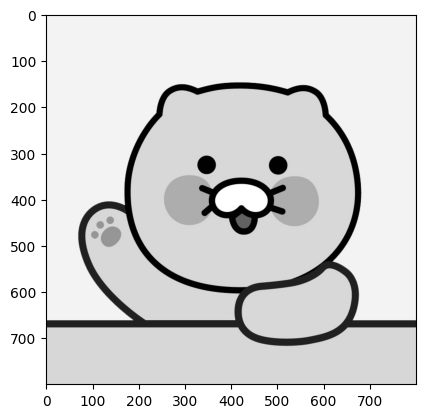

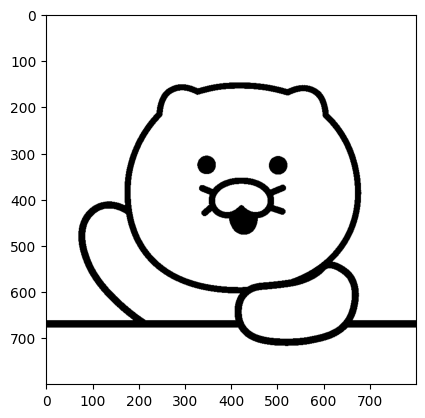

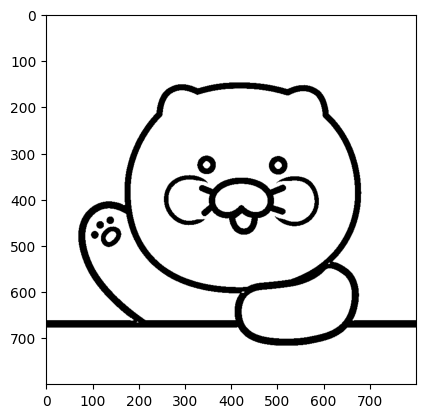

In [33]:
# ADAPTIVE_THRESH_GAUSSIAN_CPermalink
# 적용할 픽셀 (x,y)를 중심으로 하는 Block Size * Block Size 안에 있는 Gaussian 윈도우 기반의 가중치들의 합에서 C를 뺀 값을 임계점으로 설정

img_basic = cv2.imread('../assets/cs.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(img_basic, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(img_basic, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))

In [ ]:
# Tracker 란 사용자가 값을 편하게 슬라이드 바를 이용하여 움직여보면서 바꿀 수 있는 기능입니다.

# Tracker 사용방법

# cv2.createTracker(track_bar, name, window_name, value, count, on_change) : Tracker를 생성하는 함수

# value : 초기 값
# count : Max 값 (Min: 0)
# on_change : 값이 변경될 때 호출되는 Callback 함수

# cv2.getTrackerPos(track_bar, name, window_name) : Tracker로부터 값을 얻어 오는 함수
# Colab에서는 새창 띄우기 안됨 ...

In [ ]:
# 직선 그리기

# cv2.line(image, start, end, color, thickness) : 하나의 직선을 그리는 함수

# start : 시작 좌표 (2차원)
# end : 종료 좌표 (2차원)
# thickness : 선의 두께

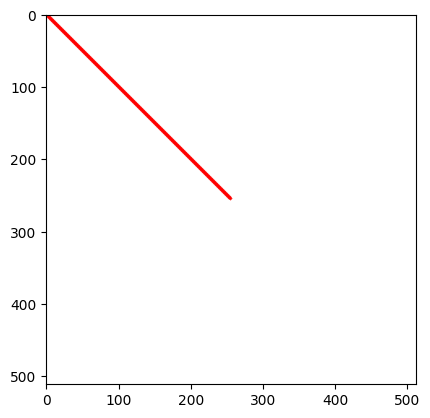

In [49]:
image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.line(image, (0, 0), (255, 255), (255, 0, 0), 3)

plt.imshow(image)
plt.show()

In [ ]:
# 사각형 그리기

# cv2.rectangle(image, start, end, color, thickness) : 하나의 사각형을 그리는 함수

# start : 시작 좌표 (2차원)
# end : 종료 좌표 (2차원)
# thickness : 선의 두께 (채우기: -1)

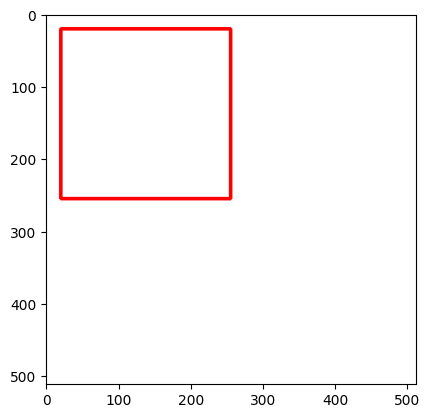

In [50]:
image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.rectangle(image, (20, 20), (255, 255), (255, 0, 0), 3)

plt.imshow(image)
plt.show()

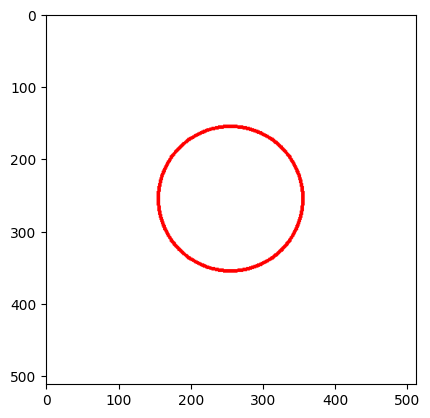

In [52]:
# 원 그리기

# cv2.circle(image, center, radian, color, thickness) : 하나의 원을 그리는 함수

# center : 원의 중심 (2차원)
# radian : 반지름
# thickness : 선의 두께 (채우기: -1)

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.circle(image, (255, 255), 100, (255, 0, 0), 3)

plt.imshow(image)
plt.show()

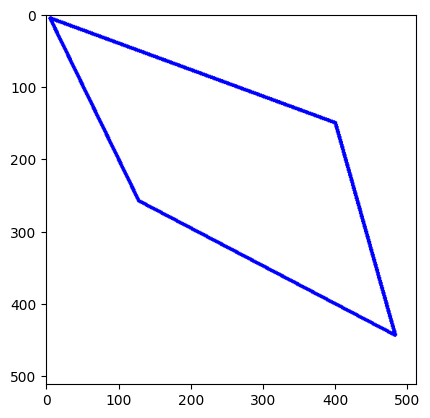

In [53]:
# 다각형 그리기

 
# cv2.polylines(image, points, is_closed, color, thickness) : 하나의 다각형을 그리는 함수

# points : 꼭지점들
# is_closed : 닫힌 도형 여부
# thickness : 선의 두께 (채우기: -1)

image = np.full((512, 512, 3), 255, np.uint8)
points = np.array([[5, 5], [128, 258], [483, 444], [400, 150]])
image = cv2.polylines(image, [points], True, (0, 0, 255), 4)

plt.imshow(image)
plt.show()

In [ ]:
# 텍스트 그리기

# cv2.putText(image, text, position, font_type, font_scale, color) : 하나의 텍스트를 그리는 함수

# position : 텍스트가 출력될 위치
# font_type : 글씨체
# font_scale : 글씨 크기 가중치

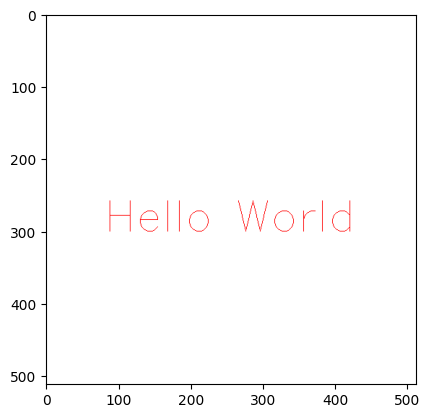

In [61]:
image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.putText(image, 'Hello World', (80, 300), cv2.FONT_ITALIC, 2, (255, 0, 0))

plt.imshow(image)
plt.show()